<a href="https://colab.research.google.com/github/sandipanpaul21/ML-Code-in-Python/blob/master/04_Outliers_%26_Missing_Values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Outliers 
  # Outlier is a data point that differs significantly from other observations
  # Outlier may be due to variability in the measurement or it may indicate experimental error
  # Outlier are sometimes excluded from the data set

# Technique to Detect Outlier - Box Plot and Z Score

# Box Plot
  # Box plot is the non-parametric method
  # It display variation in without making any assumptions of the underlying distribution
  # Graphical representation which represent follwing values as follows
    # Minimum/Lower Range : the lowest data point excluding any outliers
    # Maximum/Upper Range : the largest data point excluding any outliers
    # Median (Q2 / 50th percentile) : the middle value of the dataset
    # First quartile (Q1 / 25th percentile) : 
        # Also known as the lower quartile qn(0.25)
        # it is the median of the lower half of the dataset
    # Third quartile (Q3 / 75th percentile) : 
        # Also known as the upper quartile qn(0.75)
        # it is the median of the upper half of the dataset
    # Outlier are shown as dot or star 

# Z Score
  # It finds the distribution of Normal Data
  # In Normal Distribution, Mean is 0 and Standard Deviation is 1
  # In Z Score we will rescale the data to the center
  # And check for the data which are too far from center treated as outlier
  # In most case we take the value upto 3 (3 SD of mean, 99.7% of values within)  
  # So Z Score which are more than 3 will be treated as Outliers

# Missing Values - 

In [7]:
# Libraries 
from sklearn import datasets 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [3]:
# Load the Datasets (For indepth analysis please refer to Part O1 All About Datasets)

# Iris Dataset for Classification
# Load Dataset
iris = datasets.load_iris()
# Convert to DataFrame
iris_pd = pd.DataFrame(iris.data)
# Feature Name
iris_pd.columns = iris.feature_names
# Target Variable
iris_pd["Class"] = iris.target
# iris_pd is the final dataset

# Boston Dataset for Regression
boston = datasets.load_boston()
boston_pd = pd.DataFrame(boston.data)
boston_pd.columns = boston.feature_names
boston_pd["MEDV"] = boston.target

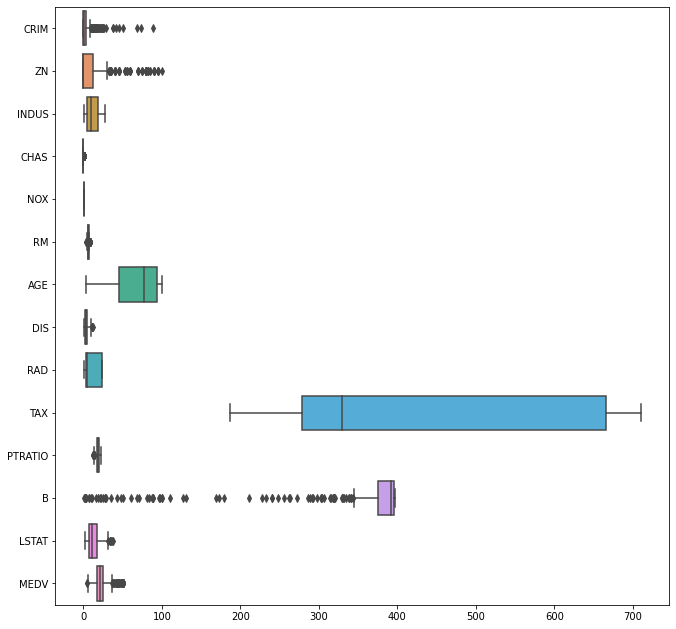

In [4]:
# Outlier Detection
# Boxplot - Outlier shown with a dot, small circle or star

# For IRIS Dataset
fig, ax = plt.subplots(figsize=(11,11)) #Sample figsize in inches,change the number accordingly
sns.boxplot(data = boston_pd,orient = 'h',ax=ax)

# Inference :
# Too Confusing, lets choose variable one 

DIS Column :
SUMMARY : 
count    506.000000
mean       3.795043
std        2.105710
min        1.129600
25%        2.100175
50%        3.207450
75%        5.188425
max       12.126500
Name: DIS, dtype: float64
BOX PLOT VALUES : 
First Quartile : 2.100175
Second Quartile : 5.1884250000000005
IQR Range : 3.0882500000000004
Lower Range : -2.5322000000000005
Upper Range : 9.820800000000002


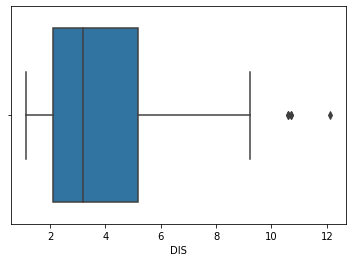

In [5]:
# Considering only one column in Boston Dataset i.e, 'DIS'
print("DIS Column :")
print("SUMMARY : ")
print(boston_pd['DIS'].describe())

def boxplot(datacolumn):
  sorted(datacolumn)
  Q1,Q3 = np.percentile(datacolumn , [25,75])
  IQR = (Q3 - Q1)
  lower_range = Q1 - (1.5 * IQR)
  upper_range = Q3 + (1.5 * IQR)
  return Q1,Q3,IQR,lower_range,upper_range

Q1,Q3,IQR,lower_range,upper_range = boxplot(boston_pd.DIS)
print("BOX PLOT VALUES : ")
print("First Quartile :",Q1)
print("Second Quartile :",Q3)
print("IQR Range :",IQR)
print("Lower Range :",lower_range)
print("Upper Range :",upper_range)

sns.boxplot(boston_pd['DIS'])
# Inference : 
# For DIS Column in Boston Dataset
# Lower Range : -2 so anything less than -2 will be treated as Outlier
# Minimum Value : 1.1 which is greater than -2 so not an outlier
# 25% Percentile / 1st Quartile / Lower Quartile / Q1 : 2.1
# 50% Percentile / Median / 2nd Quantile / Q2 : 3.2
# 75% Percentile / 3rd Quartile / Higher Quartile / Q3 : 5.1
# IQR Range / Q3 - Q1 : 3.08
# Lower Range : 9.8 so anything more than 9.8 will be treated as Outlier
# Maximum Value : 12.1 which is greater than 9.8 so IT IS AN OUTLIER

In [29]:
upper_outlier = len(boston_pd[boston_pd.DIS > upper_range])
lower_outlier = len(boston_pd[boston_pd.DIS < lower_range])
total = len(boston_pd[(boston_pd.DIS < lower_range) | (boston_pd.DIS > upper_range)])

print("Total Range is as folows")
print("Lower Range :",lower_range)
print("Upper Range :", upper_range)
print("So Number should not be less than 'Lower Range' or more than 'Upper Range'")
print("Or else it will be treated as OUTLIERS")
print("Total Outlier ABOVE UPPER RANGE :",upper_outlier)
print("Total Outlier BELOW LOWER RANGE :",lower_outlier)
print("Total Outlier in 'DIS' Column in Boston Dataset :", total)

Total Range is as folows
Lower Range : -2.5322000000000005
Upper Range : 9.820800000000002
So Number should not be less than 'Lower Range' or more than 'Upper Range'
Or else it will be treated as OUTLIERS
Total Outlier ABOVE UPPER RANGE : 5
Total Outlier BELOW LOWER RANGE : 0
Total Outlier in 'DIS' Column in Boston Dataset : 5


In [33]:
# Z Score for Detecting Outlier

z = np.abs(stats.zscore(boston_pd.DIS))
print("First 5 rows of Z-Score are")
print(z[:5]) 
print("\n")
print("Filtering out Z-Score > 3")
print("Row Number where Z-Score greater than 3")
print(np.where(z>3))

print("\n")
print("Checking exact value of the 'DIS' column which are outliers")
boston_pd.loc[[351,352,353,354,355],['DIS']]

# Inference : 
# Total Outliers are 5 whose row number are 351,352,353,354 and 355
# All the outlier are having value more than 9.8
# So Box Plot and Z score almost give exact same output for detecting outlier 

First 5 rows of Z-Score are
[0.1402136  0.55715988 0.55715988 1.07773662 1.07773662]


Filtering out Z-Score > 3
Row Number where Z-Score greater than 3
(array([351, 352, 353, 354, 355]),)


Checking exact value of the 'DIS' column which are outliers


,DIS
351,10.7103
352,10.7103
353,12.1265
354,10.5857
355,10.5857


In [39]:
# Outlier Treatment

boston_pd['DIS'] = np.where(boston_pd['DIS'] < -2.5, -2.5, boston_pd['DIS'])
boston_pd['DIS'] = np.where(boston_pd['DIS'] > 9.8, 9.8, boston_pd['DIS'])